<a href="https://colab.research.google.com/github/julmiha25-sys/Product_metrics/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Category,Count-sum
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239
25,Хлеб и хлебобулочные изделия,218
21,Снэки,212
20,Свежие фрукты,184
6,Замороженная продукция,175
7,Кондитерские изделия,138


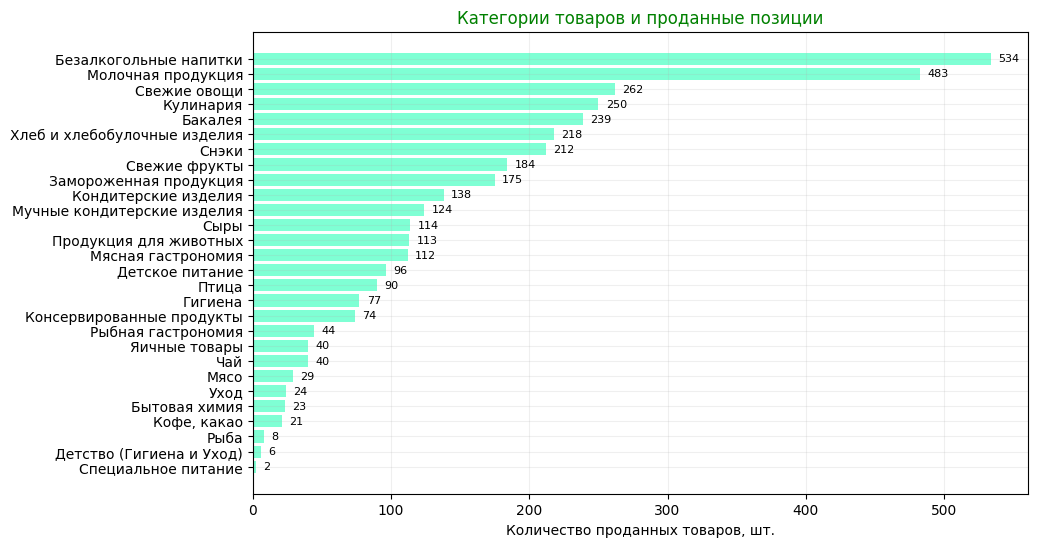

In [213]:
# Самая ходовая товарная группа
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors as mcolors
mcolors.CSS4_COLORS
dfp=pd.read_excel('products.xlsx')
dfo=pd.read_excel('orders.xlsx')
df=dfo.merge(dfp, left_on='product_id', right_on='product_id')
df1=df.groupby(['level1']).agg({'quantity':'sum'}).reset_index().sort_values('quantity',ascending=False)
df1.columns=['Category','Count-sum']
plt.figure(figsize=(10, 6))
max_value=df1['Count-sum'].max()
for i,v in enumerate(df1['Count-sum']): plt.text(v+max_value*0.01,i,f'{int(v):,}',ha='left',va='center',fontsize=8)
plt.barh(df1['Category'], df1['Count-sum'], color='aquamarine')
plt.gca().invert_yaxis()
plt.title('Категории товаров и проданные позиции', color='green')
plt.xlabel('Количество проданных товаров, шт.')
plt.grid(alpha=0.2);
df1

In [64]:
# Распределение продаж по подкатегориям
import pandas as pd
dfp=pd.read_excel('products.xlsx')
dfo=pd.read_excel('orders.xlsx')
df=dfo.merge(dfp, left_on='product_id', right_on='product_id')
df1=df.groupby(['level1','level2']).agg({'quantity':'sum'}).reset_index().sort_values(['level1','quantity'],ascending=[True, False])
df1.columns=['Category', 'Subcategory','Count-sum']
df1

,Category,Subcategory,Count-sum
10,Бакалея,Сухие блюда быстрого приготовления,38
3,Бакалея,"Крупы, бобовые",30
1,Бакалея,Зерновые для завтраков,24
4,Бакалея,Макаронные изделия,24
9,Бакалея,Соусы,24
...,...,...,...
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
98,Чай,Черный чай,26
96,Чай,Зеленый чай,7
97,Чай,Чайные напитки,7


In [107]:
# Найти средний чек на заданную дату - 13.01.2022
import pandas as pd
df=pd.read_excel('orders.xlsx')
df['accepted_at']=pd.to_datetime(df['accepted_at'],format='%Y-%m-%d %H:%M:%S').dt.date
df=df[df['accepted_at']==pd.Timestamp('2022-01-13').date()]
df['sum']=df['quantity']*df['price']
df1=df.groupby(['order_id'])['sum'].sum().reset_index()
df2=df1['sum'].mean()
print(f"Средний чек за 13.01.2022: {df2:,.2f} рублей")

Средний чек за 13.01.2022: 915.64 рублей


Доля промо в категории 'Сыры': 30.70%


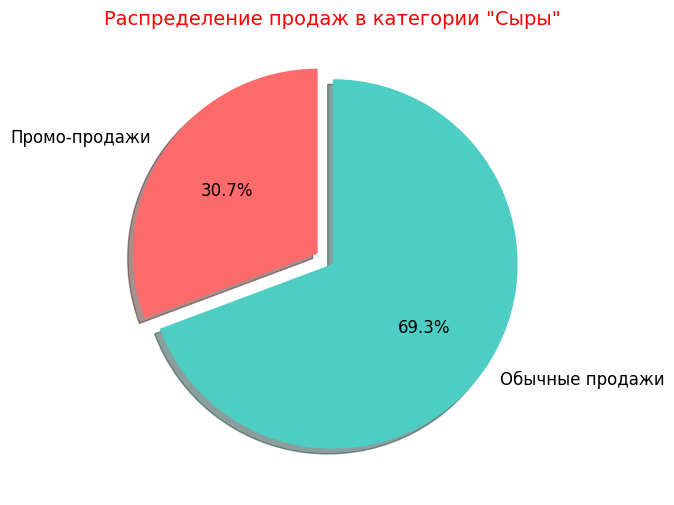

In [254]:
# Доля промо в заданной категории
import pandas as pd
import matplotlib.pyplot as plt
dfp=pd.read_excel('products.xlsx')
dfo=pd.read_excel('orders.xlsx')
df=dfo.merge(dfp, left_on='product_id', right_on='product_id')
df['summ']=df['quantity']*df['price']
df1=df[(df['level1']=='Сыры')]
df01=df1['quantity'].sum() # Все сыры (с промо и без)
df2=df1[(df1['regular_price']!=df1['price'])]
df02=df2['quantity'].sum()  # Cыры c промо
df03=df01-df02  # Обычные сыры (без промо)
plt.figure(figsize=(8, 6))
plt.pie([df02, df03],labels=['Промо-продажи','Обычные продажи'],colors=['#FF6B6B','#4ECDC4'],
        explode=(0.1, 0),shadow=True,startangle=90,textprops={'fontsize': 12},autopct='%1.1f%%')
plt.title('Распределение продаж в категории "Сыры"',fontsize=14, color='red');
print(f"Доля промо в категории 'Сыры': {(df02/df01)*100:,.2f}%")

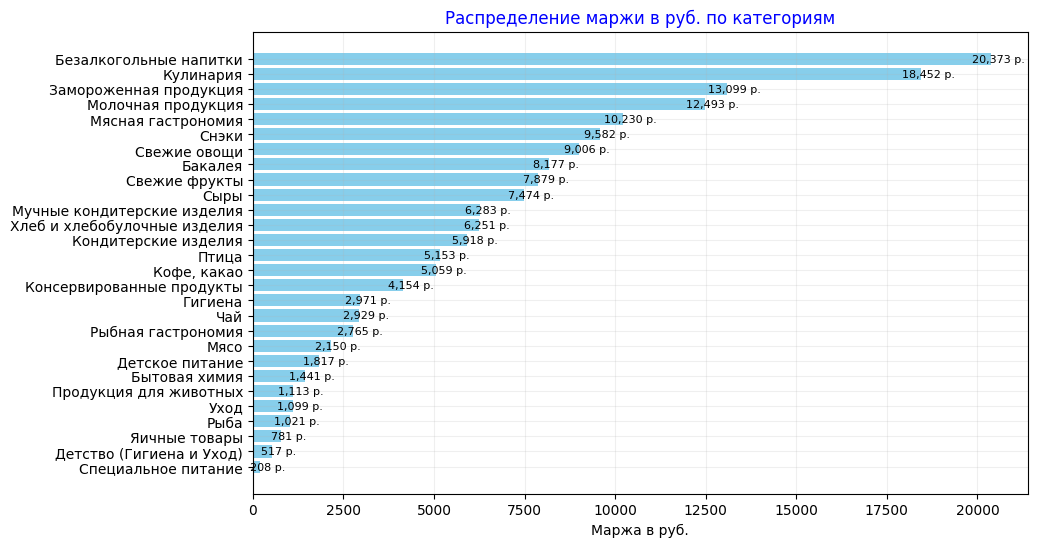

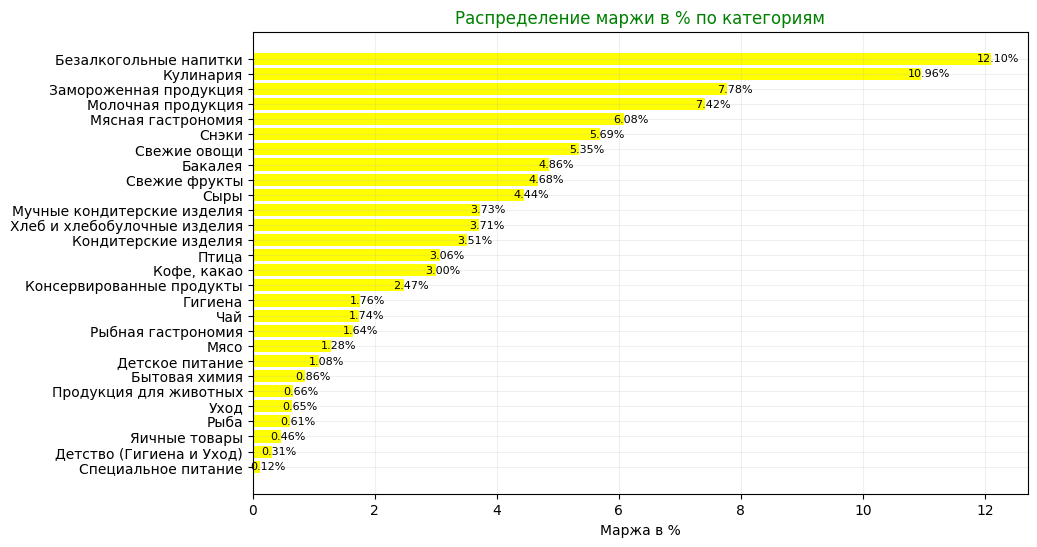

In [212]:
# Расчет маржи по категориям
import matplotlib.pyplot as plt
import pandas as pd
dfp=pd.read_excel('products.xlsx')
dfo=pd.read_excel('orders.xlsx')
df=dfo.merge(dfp, left_on='product_id', right_on='product_id')
df['marge']=df['quantity']*(df['price']-df['cost_price'])
# Расчет маржи по категориям в руб.
df1=df.groupby('level1')['marge'].agg('sum').reset_index().sort_values('marge',ascending=False)
df1.columns=['Category','Marge_rub']
# Расчет маржи по категориям в %
df2=(df.groupby('level1')['marge'].sum()/df['marge'].sum()*100).round(2).reset_index().sort_values('marge',ascending=False)
df2.columns=['Category','Marge_%']

# Барчарт 1
plt.figure(figsize=(10, 6))
max_value=df1['Marge_rub'].max()
for i,v in enumerate(df1['Marge_rub']): plt.text(v+max_value*0.01,i,f'{int(v):,} р.',ha='center',va='center',
                                                 fontsize=8)
plt.barh(df1['Category'],df1['Marge_rub'],color='skyblue')
plt.gca().invert_yaxis()
plt.title('Распределение маржи в руб. по категориям', color='blue')
plt.xlabel('Маржа в руб.')
plt.grid(alpha=0.2)

# Барчарт 2
plt.figure(figsize=(10, 6))
max_value=df2['Marge_%'].max()
for i,v in enumerate(df2['Marge_%']): plt.text(v+max_value*0.01,i,f'{v:.2f}%',ha='center',va='center',
                                                 fontsize=8)
plt.barh(df2['Category'],df2['Marge_%'],color='yellow')
plt.gca().invert_yaxis()
plt.title('Распределение маржи в % по категориям', color='green')
plt.xlabel('Маржа в %')
plt.grid(alpha=0.2)

In [249]:
# ABC анализ
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dfp=pd.read_excel('products.xlsx')
dfo=pd.read_excel('orders.xlsx')
# ABC-анализ продаж по количеству
df=dfo.merge(dfp, left_on='product_id', right_on='product_id')
df1=df.groupby('level2')['quantity'].sum().reset_index().sort_values('quantity',ascending=False)
df1.columns=['Subcategoty','Sum_quantity']
df1['Cumulative_%_quantity']=(df1['Sum_quantity'].cumsum()/(df1['Sum_quantity'].sum())*100).round(2)
df1['ABC-quantity']=np.where(df1['Cumulative_%_quantity']<=80,'A',np.where(df1['Cumulative_%_quantity']<=95,'B','C'))
df1
# ABC-анализ по сумме продаж
df['summ']=df['quantity']*df['price']
df2=df.groupby('level2')['summ'].sum().reset_index().sort_values('summ',ascending=False)
df2.columns=['Subcategoty','Sum_sales']
df2['Cumulative_%_summ']=(df2['Sum_sales'].cumsum()/(df2['Sum_sales'].sum())*100).round(2)
df2['ABC-summ']=np.where(df2['Cumulative_%_summ']<=80,'A',np.where(df2['Cumulative_%_summ']<=95,'B','C'))
df2
# Итоговая группа на основании двух анализов
df3=df2.merge(df1, left_on='Subcategoty', right_on='Subcategoty')
df3['ABC-category']=df3['ABC-quantity']+df3['ABC-summ']
df3

,Subcategoty,Sum_sales,Cumulative_%_summ,ABC-summ,Sum_quantity,Cumulative_%_quantity,ABC-quantity,ABC-category
0,Готовые блюда,40356,9.03,A,248,13.40,A,AA
1,Напитки,24123,14.43,A,252,6.75,A,AA
2,Мясо птицы охлажденное,22349,19.43,A,90,53.40,A,AA
3,"Тепличные овощи, грибы",18329,23.54,A,105,48.20,A,AA
4,Снэки соленые,17293,27.41,A,180,24.06,A,AA
...,...,...,...,...,...,...,...,...
95,Средства для сантехники,239,99.84,C,1,99.97,C,CC
96,"Какао, горячий шоколад",238,99.89,C,2,99.46,C,CC
97,Уход за одеждой и обувью,235,99.95,C,3,98.71,C,CC
98,Первая помощь,168,99.98,C,2,99.79,C,CC
